In [46]:
import matplotlib.pyplot as plt
import numpy as np
from reactor.simulator import Simulator, Fluid, Reactor

## Initial Conditions

In [47]:
w0 = 0.02 #weigth fraction of sulfur.
w1 = (1284 - 518)*1e-6 #weigth fraction of non basic nitrogen.
w2 = 518*1e-6 #weigth fraction of basic nitrogen.
w3= 0.419 #weigth fraction of aromatic compounds.
pG40 = 5.3
pG50 = 0
cL40 = pG40/Fluid().Henry_H2 #inlet concentration of hydrogen in mol/cm^3 .
cL50 = 0 #inlet concentration of hidrogen sulfite in mol/cm^3 .
cL60 = 0 #inlet concentration of naphtneses in mol/cm^3.

y0 = np.array([w0, w1, w2, w3, cL40, cL50, cL60, pG40, pG50])

Mm1 = 441.9

In [48]:
simulator = Simulator(y0, heterogeneous = False, n_points = 3)


In [49]:
%%time
simulator.solve()

CPU times: total: 125 ms
Wall time: 121 ms


In [50]:
surface_concentrations= simulator.get_surface_concentrations_profiles()

cs0_profile, cs1_profile, cs2_profile, cs3_profile, cs4_profile, cs5_profile, cs6_profile = surface_concentrations

## Experimental Conditons

In [51]:
cexp_0 = 0.0055*Fluid().rhoL/Mm1

cexp_1 = 758e-6*Fluid().rhoL/Mm1

cexp_2 = 360e-6*Fluid().rhoL/Mm1

cexp_3 = 0.38 * Fluid().rhoL/Mm1

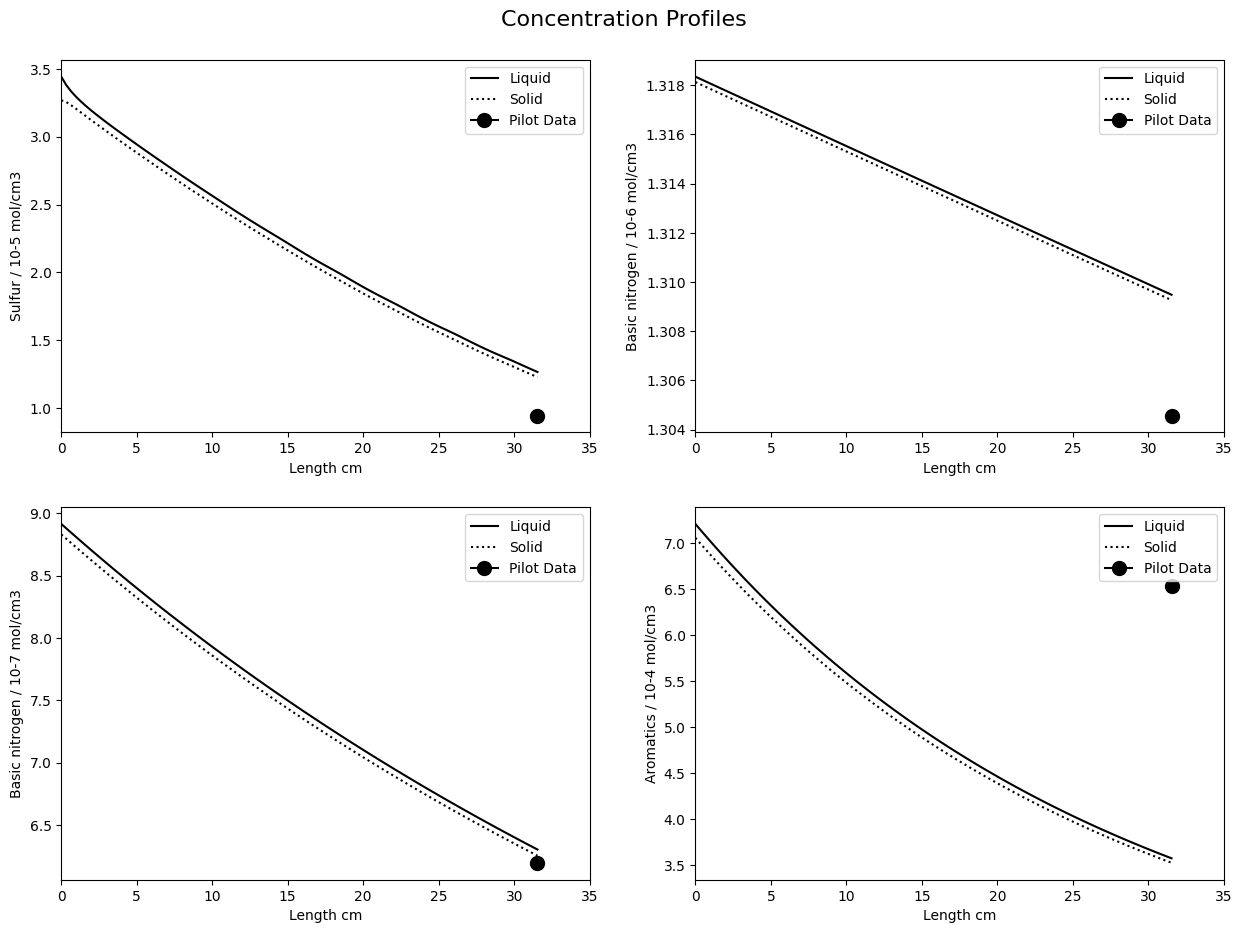

In [52]:
z = Reactor().z

t_eval = np.linspace(0, 31.54, 100)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plot the first dataset (y_values1) on the left axis (Y-axis)
ax[0,0].plot(t_eval, simulator.cL0_profile*1e5, color='black', label = 'Liquid')
ax[0,0].plot(t_eval, cs0_profile*1e5, color='black', linestyle = 'dotted', label = 'Solid')
ax[0,0].plot(z, cexp_0*1e5, label = 'Pilot Data', marker = 'o', color='black', markersize=10)

ax[0,0].set_xlim(0,35)
ax[0,0].legend(loc='upper right')

# Add labels and a legend
ax[0,0].set_xlabel('Length cm')
ax[0,0].set_ylabel('Sulfur / 10-5 mol/cm3', color='black')

ax[0,1].plot(t_eval, simulator.cL1_profile*1e6, color='black', label = 'Liquid')
ax[0,1].plot(t_eval, cs1_profile*1e6, color='black', linestyle = 'dotted', label = 'Solid')
ax[0,1].plot(z, cexp_1*1e6, label = 'Pilot Data', marker = 'o', color='black', markersize=10)

ax[0,1].set_xlim(0,35)
ax[0,1].legend(loc='upper right')

# Add labels and a legend
ax[0,1].set_xlabel('Length cm')
ax[0,1].set_ylabel('Basic nitrogen / 10-6 mol/cm3', color='black')

# Add labels and a legend
ax[1,0].set_xlabel('Length cm')
ax[1,0].set_ylabel('Basic nitrogen / 10-7 mol/cm3', color='black')

ax[1,0].plot(t_eval, simulator.cL2_profile*1e7, color='black', label = 'Liquid')
ax[1,0].plot(t_eval, cs2_profile*1e7, color='black', linestyle = 'dotted', label = 'Solid')
ax[1,0].plot(z, cexp_2*1e7, label = 'Pilot Data', marker = 'o', color='black', markersize=10)

ax[1,0].set_xlim(0,35)
ax[1,0].legend(loc='upper right')

# Add labels and a legend
ax[1,0].set_xlabel('Length cm')
ax[1,0].set_ylabel('Basic nitrogen / 10-7 mol/cm3', color='black')

ax[1,1].plot(t_eval, simulator.cL3_profile*1e4, color='black', label = 'Liquid')
ax[1,1].plot(t_eval, cs3_profile*1e4, color='black', linestyle = 'dotted', label = 'Solid')
ax[1,1].plot(z, cexp_3*1e4, label = 'Pilot Data', marker = 'o', color='black', markersize=10)

ax[1,1].set_xlim(0,35)
ax[1,1].legend(loc='upper right')

# Add labels and a legend
ax[1,1].set_xlabel('Length cm')
ax[1,1].set_ylabel('Aromatics / 10-4 mol/cm3', color='black')

# Add a title to the entire figure
plt.suptitle("Concentration Profiles", fontsize=16)

# Adjust spacing between the title and the subplots
plt.subplots_adjust(top=0.93)

# Display the graph
plt.show()

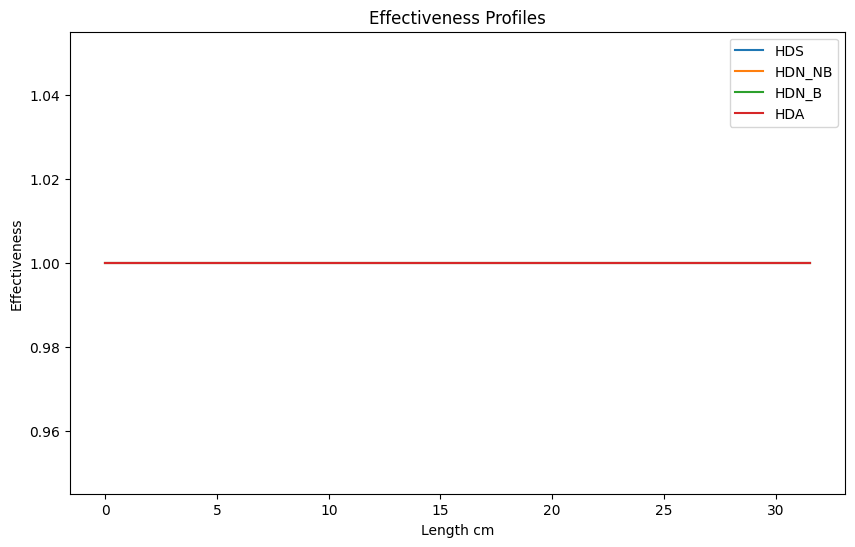

In [53]:
effectiveness_profiles = simulator.get_evectiveness_profile(surface_concentrations)

# Create a single graph with four plots
plt.figure(figsize=(10, 6))

plt.plot(t_eval, effectiveness_profiles[0], label='HDS')
plt.plot(t_eval, effectiveness_profiles[1], label='HDN_NB')
plt.plot(t_eval, effectiveness_profiles[2], label='HDN_B')
plt.plot(t_eval, effectiveness_profiles[3], label='HDA')

# Add legend and labels
plt.legend()
plt.xlabel('Length cm')
plt.ylabel('Effectiveness')
plt.title(f'Effectiveness Profiles')

# Show the plot
plt.show()